## 好坏质检分类实战task：  
1、基于data_class_raw.csv数据，根据高斯分布概率密度函数，寻找异常点并剔除  
2、基于data_class_processed.csv数据，进行PCA处理，确定重要数据维度及成分  
3、完成数据分离，数据分离参数：random_state=4,test_size=0.4  
4、建立KNN模型完成分类，n_neighbors取10，计算分类准确率，可视化分类边界  
5、计算测试数据集对应的混淆矩阵，计算准确率、召回率、特异度、精确率、F1分数  
6、尝试不同的n_neighbors（1-20）,计算其在训练数据集、测试数据集上的准确率并作图  

In [3]:
# load the data 
import pandas as pd
import numpy as np

import sys
# setting path
sys.path.append('../')


In [4]:
# load the data
data = pd.read_csv('../data_class_raw.csv')
data.head()

,x1,x2,y
0,0.77,3.97,0
1,1.71,2.81,0
2,2.18,1.31,0
3,3.80,0.69,0
4,5.21,1.14,0


In [5]:
# define X and y
X = data.drop(['y'], axis=1)
y = data.loc[:, 'y']

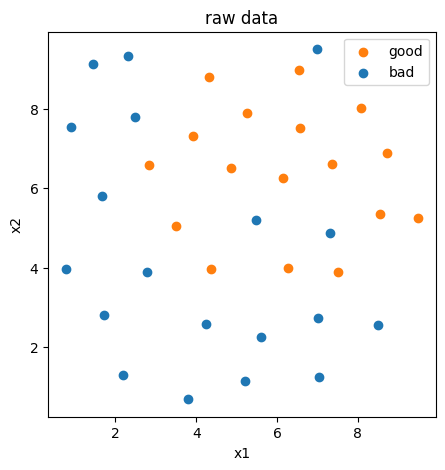

In [6]:
# visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5, 5))
bad = plt.scatter(X.loc[:, 'x1'][y == 0], X.loc[:, 'x2'][y == 0])
good = plt.scatter(X.loc[:, 'x1'][y == 1], X.loc[:, 'x2'][y == 1])

plt.legend((good, bad), ('good', 'bad'))
plt.title("raw data")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
# anomaly detection
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination=0.02)
